In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('realistic_fire_detection_dataset.csv')

In [3]:
df.head()

,sensor_timestamp,sensor_value,fire_lat,fire_lon,confidence,fire_radiative_power,modis_timestamp,fire_detected
0,2025-04-06 13:53:57.122911,349,-24.0804,-15.6437,20,3.12,2025-04-06 13:52:00.122911,0
1,2025-04-06 13:54:57.122911,286,-33.5591,52.7432,39,14.16,2025-04-06 13:53:50.122911,0
2,2025-04-06 13:55:57.122911,684,-7.0097,-16.5001,86,88.22,2025-04-06 13:55:13.122911,1
3,2025-04-06 13:56:57.122911,400,-8.2277,53.7423,46,12.37,2025-04-06 13:54:17.122911,0
4,2025-04-06 13:57:57.122911,341,32.5942,40.6298,17,18.98,2025-04-06 13:57:19.122911,0


In [4]:
len(df)

1000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sensor_timestamp      1000 non-null   object 
 1   sensor_value          1000 non-null   int64  
 2   fire_lat              1000 non-null   float64
 3   fire_lon              1000 non-null   float64
 4   confidence            1000 non-null   int64  
 5   fire_radiative_power  1000 non-null   float64
 6   modis_timestamp       1000 non-null   object 
 7   fire_detected         1000 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [6]:
df.describe()

,sensor_value,fire_lat,fire_lon,confidence,fire_radiative_power,fire_detected
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,367.615000,0.747853,18.168378,48.434000,34.744670,0.287000
std,149.519071,20.100965,21.316151,29.779632,41.214084,0.452588
min,100.000000,-34.999200,-19.961000,0.000000,0.000000,0.000000
25%,261.000000,-16.155975,-0.629050,23.000000,7.697500,0.000000
50%,358.500000,0.849900,18.822000,45.000000,15.265000,0.000000
75%,446.000000,18.332775,35.799725,77.000000,52.607500,1.000000
max,823.000000,34.768800,54.928700,99.000000,149.920000,1.000000


In [8]:
df.isnull()

,sensor_timestamp,sensor_value,fire_lat,fire_lon,confidence,fire_radiative_power,modis_timestamp,fire_detected
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [9]:
df.columns

Index(['sensor_timestamp', 'sensor_value', 'fire_lat', 'fire_lon',
       'confidence', 'fire_radiative_power', 'modis_timestamp',
       'fire_detected'],
      dtype='object')

In [10]:

# Drop timestamps (they're not needed for prediction)
df_model = df.drop(columns=['sensor_timestamp', 'modis_timestamp'])

In [12]:
df_model.head()

,sensor_value,fire_lat,fire_lon,confidence,fire_radiative_power,fire_detected
0,349,-24.0804,-15.6437,20,3.12,0
1,286,-33.5591,52.7432,39,14.16,0
2,684,-7.0097,-16.5001,86,88.22,1
3,400,-8.2277,53.7423,46,12.37,0
4,341,32.5942,40.6298,17,18.98,0


In [13]:
# Separate features and target
X = df_model.drop(columns='fire_detected')
y = df_model['fire_detected']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[143   0]
 [  0  57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [17]:
# Example new data
new_data = pd.DataFrame([{
    'sensor_value': 530,
    'fire_lat': 1.2921,
    'fire_lon': 36.8219,
    'confidence': 82,
    'fire_radiative_power': 45.7
}])

prediction = model.predict(new_data)[0]
print("🔥 Fire Detected!" if prediction == 1 else "✅ No Fire Detected")


🔥 Fire Detected!


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


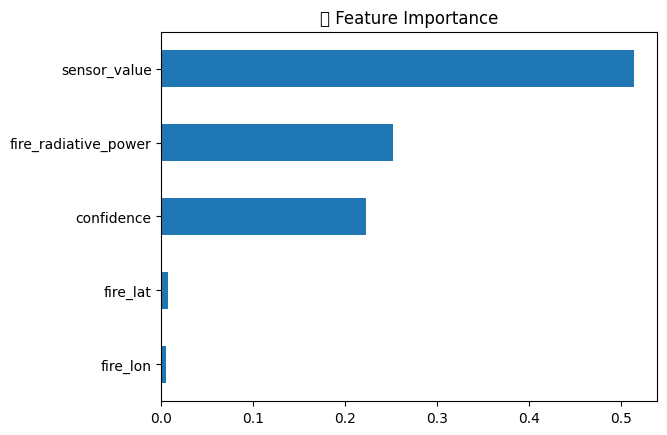

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("🔥 Feature Importance")
plt.show()


In [19]:
# Get feature importances from the trained model
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Print the feature importances
print("Feature Importance:")
print(sorted_feature_importance)


Feature Importance:
sensor_value            0.513522
fire_radiative_power    0.251542
confidence              0.222612
fire_lat                0.007282
fire_lon                0.005042
dtype: float64
